In [1]:
import os
import sys
import pandas as pd
import numpy as np
from random import random 
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter


In /home/sanchit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sanchit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sanchit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/sanchit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sanchit/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [42]:
path, folders, imgs = list(os.walk('/home/sanchit/Desktop/app/Selfie-dataset/images'))[0]


In [45]:
#removing non jpg files

for img in imgs:
    imgPath = os.path.join(path, img)
    if os.path.splitext( imgPath )[1] != '.jpg':
        os.remove(imgPath)

In [296]:
pathdata1, folders, imgs = list(os.walk('/home/sanchit/Desktop/app/Selfie-dataset/images' ))[0]

In [29]:
data1 = pd.DataFrame( np.zeros((50000,2)), columns =  ['class', 'address'])

In [263]:
selfDataPath = os.path.join( os.getcwd(), 'Selfie-dataset', 'selfie_dataset.txt')

idx = 0
with open(selfDataPath) as f:
    for line in f:
        temp = line.split(' ')
        data1.iloc[idx, 0 ] = float(temp[1])
        data1.iloc[idx, 1 ] = temp[0]
        idx += 1


data1.apply( lambda x: os.path.join( os.getcwd(), 'Selfie-dataset', 'images' ,x), inplace = True)

In [293]:
data1['address'] = data1['address'].apply( lambda x: x+'.jpg')
data1['address'] = data1['address'].apply( lambda x: os.path.join( pathdata1, x))

/home/sanchit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [300]:
#data1 = data
data1 

,class,address
0,3.901,/home/sanchit/Desktop/app/Selfie-dataset/image...
1,4.385,/home/sanchit/Desktop/app/Selfie-dataset/image...
2,4.243,/home/sanchit/Desktop/app/Selfie-dataset/image...
3,4.169,/home/sanchit/Desktop/app/Selfie-dataset/image...
4,3.873,/home/sanchit/Desktop/app/Selfie-dataset/image...
...,...,...
46831,4.537,/home/sanchit/Desktop/app/Selfie-dataset/image...
46832,5.311,/home/sanchit/Desktop/app/Selfie-dataset/image...
46833,3.577,/home/sanchit/Desktop/app/Selfie-dataset/image...
46834,5.033,/home/sanchit/Desktop/app/Selfie-dataset/image...


(array([   18.,   151.,   972.,  4448., 11622., 15848., 10022.,  3230.,
          488.,    37.]),
 array([1.656 , 2.1618, 2.6676, 3.1734, 3.6792, 4.185 , 4.6908, 5.1966,
        5.7024, 6.2082, 6.714 ]),
 <BarContainer object of 10 artists>)

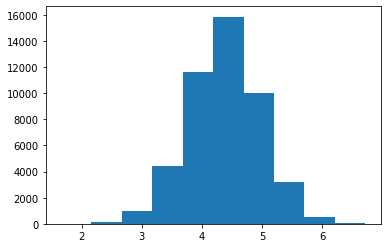

In [307]:
plt.hist(data1.sort_values('class')['class'])

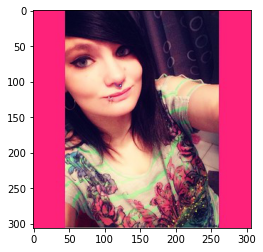

In [292]:
plt.imshow(Image.open(os.path.join(path,data1[data1['class']>6]['address'].tolist()[1]+'.jpg')))

In [318]:
#data2
import random
from collections import Counter

data = pd.DataFrame( np.zeros( (2000,2 )), columns = ['class', 'address'])
path, folders, imgs = list(os.walk( '/home/sanchit/Desktop/app/img'))[0]
data2idx = [ random.randint(0, 122954) for i in range (2000)]

imgs = pd.Series(imgs)
imgs = imgs[imgs.index.isin(data2idx)]

for i,img in enumerate(imgs):
    data.loc[i, 'address'] = img
data = data.iloc[:len(imgs)]
data['class'] = 7
data2 = data
data2['address'] = data2['address'].apply( lambda x: os.path.join(path, x))

In [345]:
data2

,class,address
0,7,/home/sanchit/Desktop/app/img/img_00004160.jpg
1,7,/home/sanchit/Desktop/app/img/img_00050875.jpg
2,7,/home/sanchit/Desktop/app/img/img_00085234.jpg
3,7,/home/sanchit/Desktop/app/img/img_00111634.jpg
4,7,/home/sanchit/Desktop/app/img/img_00082438.jpg
...,...,...
1975,7,/home/sanchit/Desktop/app/img/img_00026246.jpg
1976,7,/home/sanchit/Desktop/app/img/img_00063674.jpg
1977,7,/home/sanchit/Desktop/app/img/img_00072639.jpg
1978,7,/home/sanchit/Desktop/app/img/img_00015042.jpg


In [418]:
traindata = data1.sample( 8000)

In [419]:
traindata = traindata.append( data2)

In [354]:
traindata.to_csv('/home/sanchit/Desktop/app/sampledData10000.csv')

In [355]:
traindata2 = data1.sample(15000)

In [357]:
traindata2 = traindata2.append( data2)

In [358]:
traindata2.to_csv('/home/sanchit/Desktop/app/sampledData17000.csv')

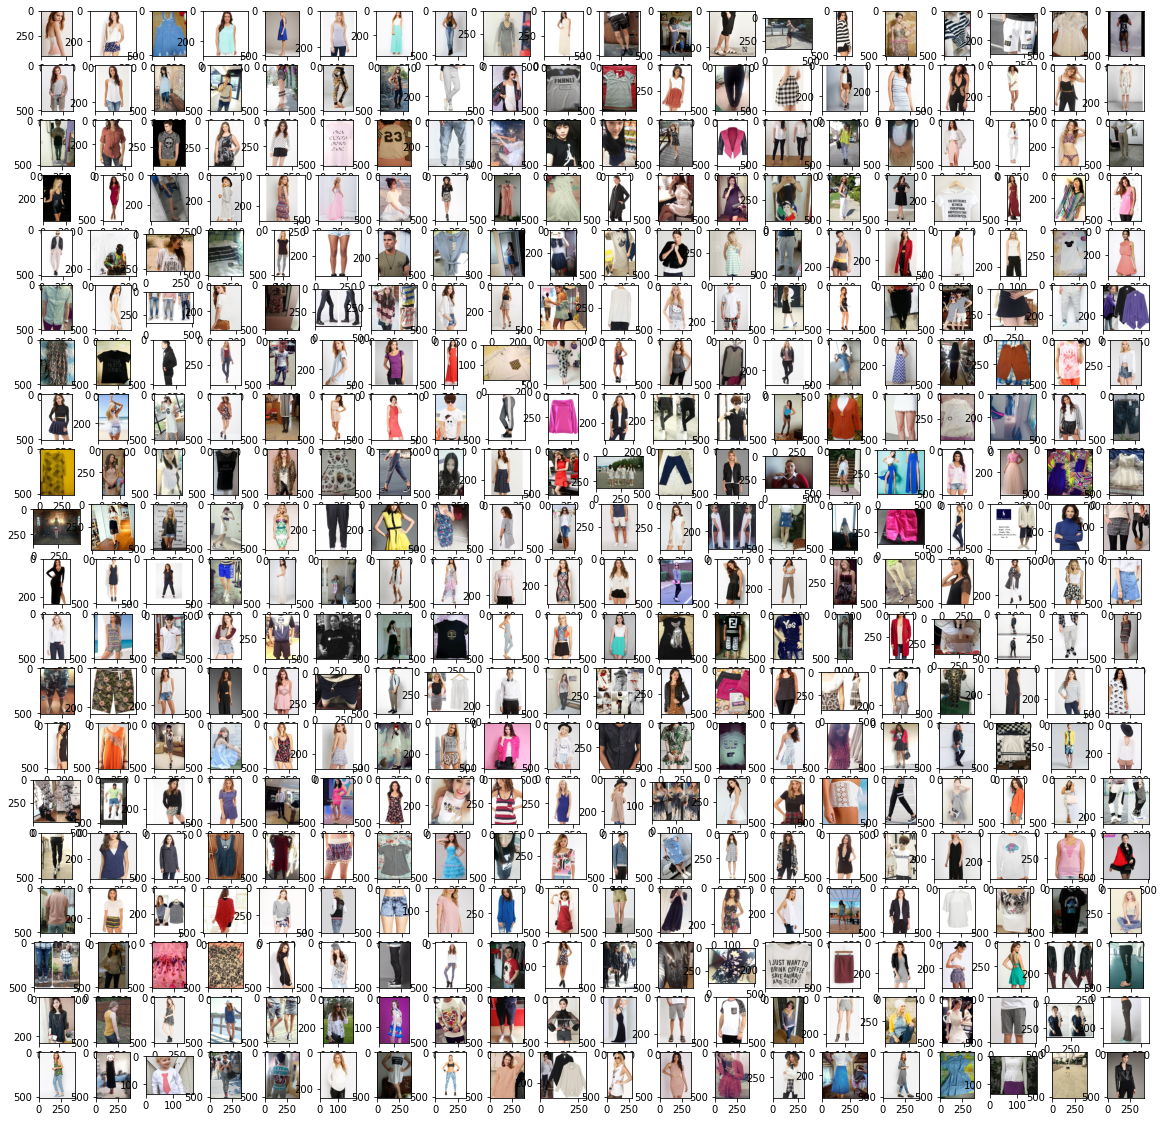

In [376]:
x = data2.sample(400)
fig, axes = plt.subplots(20,20, figsize = (20,20))
i = 0 
for  ax in axes:
    for m in ax:
        m.imshow(Image.open(x.iloc[i, 1] ))
        i += 1

(306, 306)

     class                                     address
869    3.0  10005484_1410934675838033_1131497713_a.jpg


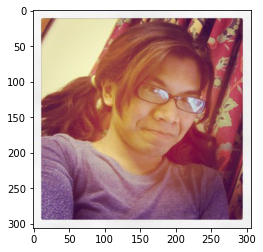

In [260]:

rannum = random()
imgname = data.iloc[round(random()*1000/random())][1]
pilimg = Image.open(os.path.join(path, imgname))
print( data[data['address'] == imgname])
plt.imshow(pilimg)

In [380]:
path, folders, imgs = list(os.walk( '/home/sanchit/Desktop/app/menWomen/men'))[0]

In [381]:
menData = pd.DataFrame( np.zeros((2000, 2)), columns = ['class', 'address'])
for i, img in enumerate(imgs):
    menData.loc[i, 'address'] = img
menData = menData.iloc[:i]

In [392]:
menData['address']=  menData['address'].apply(lambda x: os.path.join(path, x))

/home/sanchit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [403]:
traindata2.append(menData).to_csv('/home/sanchit/Desktop/app/sampledData18900men.csv')

In [397]:
len(traindata.append(menData))

11392

In [420]:
traindata.append(menData).to_csv('/home/sanchit/Desktop/app/sampledData11392men.csv')

In [421]:
Data18900 = traindata2.append(menData)

In [424]:
#analysis of Size of Data in data18900
data18k = pd.read_csv('/home/sanchit/Desktop/app/sampledData18900men.csv')

In [ ]:
data18k = data18k.drop('Unnamed: 0',1)

In [432]:
data18k['size'] = data18k['address'].apply( lambda x: (Image.open(x).size))

In [435]:
data18k['size1'] = data18k['size'].apply(lambda x: x[0])
data18k['size2'] = data18k['size'].apply(lambda x: x[1])

(array([  1.,   0.,   2.,   2.,   1.,  15.,  14.,  38., 124.,  60.]),
 array([ 36. ,  54.8,  73.6,  92.4, 111.2, 130. , 148.8, 167.6, 186.4,
        205.2, 224. ]),
 <BarContainer object of 10 artists>)

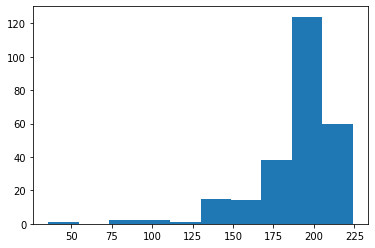

In [439]:
plt.hist(data18k[data18k['size1']<= 224]['size1'])

In [382]:
#making customized data
data = pd.DataFrame(np.zeros((10000,2)), columns = ['class', 'address'])
i = 0
for root, _, files in  list(os.walk('/home/sanchit/Desktop/app/manual_dataset'))[1:]:
    val  = root.split('/')
    if( val[-1] in ['1','2','3','4','5'] ):
        val = int(val[-1])
        for file in files:
            data.iloc[i, 1] = os.path.join(root, file)
            data.iloc[i, 0] = val
            i+=1
manual_data = data.iloc[:i]

In [270]:
selfieDataPath = os.path.join( os.getcwd(), 'Selfie-dataset', 'selfie_dataset.txt')
selfieDatamain = pd.DataFrame( np.zeros((50000,2)), columns =  ['class', 'address'])

idx = 0
with open(selfieDataPath) as f:
    for line in f:
        temp = line.split(' ')
        selfieDatamain.iloc[idx, 0 ] = float(temp[1])
        selfieDatamain.iloc[idx, 1 ] = temp[0]
        idx += 1

selfieDatamain = selfieDatamain.iloc[:idx]
path, folders, imgs = list(os.walk('/home/sanchit/Desktop/app/Selfie-dataset/images' ))[0]
selfieDatamain['address'] = selfieDatamain['address'].apply( lambda x: x+'.jpg')
selfieDatamain['address'] = selfieDatamain['address'].apply( lambda x: os.path.join( path, x))

In [383]:
selfieData = selfieDatamain.copy()

In [384]:
motionBlur = pd.DataFrame(np.zeros((500, 2)), columns = ['class', 'address'])
focusBlur = pd.DataFrame(np.zeros((500, 2)), columns = ['class', 'address'])
path1 = '/home/sanchit/Desktop/app/blurData'
motionAd = list(os.walk( os.path.join(path1 , 'motion_blurred')))[0][2]
focusAd = list(os.walk( os.path.join(path1 , 'defocused_blurred')))[0][2]
i = 0
for ad1, ad2 in zip(motionAd, focusAd):
    motionBlur.iloc[i,1] = os.path.join( path1,'motion_blurred', ad1)
    focusBlur.iloc[i,1] = os.path.join( path1,'defocused_blurred', ad2)
    i+=1
motionBlur = motionBlur.iloc[:i]
focusBlur = focusBlur.iloc[:i]

In [385]:
#menWomen
root = '/home/sanchit/Desktop/app'
women = pd.DataFrame({'class': 0, 'address' : list(os.walk( os.path.join( root,'menWomen', "women" )))[0][2]})
men = pd.DataFrame({ 'class': 0, 'address': list(os.walk( os.path.join( root,'menWomen', "men" )))[0][2]})

women['address'] = women['address'].apply( lambda x: os.path.join( root,'menWomen', "women" , x))
men['address'] = men['address'].apply( lambda x: os.path.join( root,'menWomen', "men" , x))



In [67]:
# #making Seperate Folder for analysis
# import shutil
# import random
# path, folders, imgs = list(os.walk( '/home/sanchit/Desktop/app/img'))[0]
# data2idx = [ random.randint(0, 122952) for i in range (5000)]

# for i in data2idx:
#     shutil.copy(os.path.join(path, imgs[i]), '/home/sanchit/Desktop/app/subsetFashion' )

#NOW I HAVE CLEANED subsetFASHIONDATA manually  WHOSE BAD DATA IS IN FOLDER BADFASHIONDATA AND 
 
# path, folders, imgs = list(os.walk( '/home/sanchit/Desktop/app/fashionData/badsamples' ))[0] #earlier /app/badFashionsamples

In [72]:
# #remove these images from subsetFashion Data
# path_, folder_, imgs_ = list(os.walk( '/home/sanchit/Desktop/app/fashionData/GoodSamples'))[0] #earlier(/app/subsetFashion)

# removeFiles = set(imgs_).intersection(imgs)

# for file in removeFiles:
#     os.remove(os.path.join( path_, file))

In [386]:
path, folders, imgs = list(os.walk( '/home/sanchit/Desktop/app/fashionData/badSamples' ))[0]
path_, folder_, imgs_ = list(os.walk( '/home/sanchit/Desktop/app/fashionData/goodSamples'))[0]

badFashion = pd.DataFrame({'class': 0, 'address' :imgs} )
badFashion['address'] = badFashion['address'].apply( lambda x: os.path.join(path, x) )

goodFashion = pd.DataFrame({'class':0 , 'address' : imgs_ })
goodFashion['address'] = goodFashion['address'].apply( lambda x: os.path.join(path_, x) )

In [387]:
goodFashion['class'] = 0
badFashion['class'] = 0

### data that I have

manualData

selfieData

men      ---      women

goodFashion   ----   badFashion

motionBlur    ----    focusBlur

In [322]:
selfieData.head()

,class,address
0,3.901,/home/sanchit/Desktop/app/Selfie-dataset/image...
1,4.385,/home/sanchit/Desktop/app/Selfie-dataset/image...
2,4.243,/home/sanchit/Desktop/app/Selfie-dataset/image...
3,4.169,/home/sanchit/Desktop/app/Selfie-dataset/image...
4,3.873,/home/sanchit/Desktop/app/Selfie-dataset/image...


In [323]:
manual_data.head()

,class,address
0,5.0,/home/sanchit/Desktop/app/manual_dataset/5/IMG...
1,5.0,/home/sanchit/Desktop/app/manual_dataset/5/4in...
2,5.0,/home/sanchit/Desktop/app/manual_dataset/5/IMG...
3,5.0,/home/sanchit/Desktop/app/manual_dataset/5/IMG...
4,5.0,/home/sanchit/Desktop/app/manual_dataset/5/IMG...


In [324]:
men.head()

,class,address
0,0,/home/sanchit/Desktop/app/menWomen/men/0000202...
1,0,/home/sanchit/Desktop/app/menWomen/men/0000184...
2,0,/home/sanchit/Desktop/app/menWomen/men/0000123...
3,0,/home/sanchit/Desktop/app/menWomen/men/0000095...
4,0,/home/sanchit/Desktop/app/menWomen/men/0000091...


In [325]:
women.head()

,class,address
0,0,/home/sanchit/Desktop/app/menWomen/women/00001...
1,0,/home/sanchit/Desktop/app/menWomen/women/00001...
2,0,/home/sanchit/Desktop/app/menWomen/women/00002...
3,0,/home/sanchit/Desktop/app/menWomen/women/00001...
4,0,/home/sanchit/Desktop/app/menWomen/women/00001...


In [326]:
motionBlur.head()

,class,address
0,0.0,/home/sanchit/Desktop/app/blurData/287_WILEYFO...
1,0.0,/home/sanchit/Desktop/app/blurData/104_IPHONE-...
2,0.0,/home/sanchit/Desktop/app/blurData/124_HONOR-7...
3,0.0,/home/sanchit/Desktop/app/blurData/274_NIKON-D...
4,0.0,/home/sanchit/Desktop/app/blurData/141_NIKON-D...


In [327]:
focusBlur.head()

,class,address
0,0.0,/home/sanchit/Desktop/app/blurData/232_SAMSUNG...
1,0.0,/home/sanchit/Desktop/app/blurData/53_NIKON-D3...
2,0.0,/home/sanchit/Desktop/app/blurData/85_HONOR-8X...
3,0.0,/home/sanchit/Desktop/app/blurData/167_HONOR-7...
4,0.0,/home/sanchit/Desktop/app/blurData/222_IPHONE-...


In [328]:
goodFashion.head()

,class,address
0,0,/home/sanchit/Desktop/app/fashionData/goodSamp...
1,0,/home/sanchit/Desktop/app/fashionData/goodSamp...
2,0,/home/sanchit/Desktop/app/fashionData/goodSamp...
3,0,/home/sanchit/Desktop/app/fashionData/goodSamp...
4,0,/home/sanchit/Desktop/app/fashionData/goodSamp...


In [329]:
badFashion.head()

,class,address
0,0,/home/sanchit/Desktop/app/fashionData/badSampl...
1,0,/home/sanchit/Desktop/app/fashionData/badSampl...
2,0,/home/sanchit/Desktop/app/fashionData/badSampl...
3,0,/home/sanchit/Desktop/app/fashionData/badSampl...
4,0,/home/sanchit/Desktop/app/fashionData/badSampl...


In [389]:
check = {1:{1: 125}, 2:{2:180, 3:49}, 3:{3:150, 4:51}, 4: {6:112}, 5:{7:56}}
manual_data_sample = pd.DataFrame(columns = ['class', 'address'])
filestaken = []

for i, breakup in list(check.items()):
    for newscore, s_size in list(breakup.items()):
        x = manual_data[manual_data['class'] == i]
        boolic = x['address'].isin(filestaken).apply(lambda x: not x)
        x = x[boolic].sample(s_size)
        x['class'] = newscore
        filestaken.extend(x['address'].to_list())
        manual_data_sample = manual_data_sample.append(x)

In [390]:
check = {1:6,2:500,3:3000, 4:4000, 5:3000, 6:125}
selfieData_sample = pd.DataFrame(columns = ['class', 'address'])
filestaken = []

for class_, s_size in list( check.items()):
    x = selfieData[selfieData['address'].isin(filestaken).apply( lambda x: not x)]
    x = x[x['class']>= class_][x['class'] <class_+1].sample(s_size)
    filestaken.extend(x['address'].to_list())
    
    selfieData_sample = selfieData_sample.append(x)

/home/sanchit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [391]:
focus_motion_sample =  pd.DataFrame(columns = ['class', 'address'])
x = focusBlur.sample(300)
x.iloc[:101, 0] = 1
x.iloc[101:, 0] = 2

focus_motion_sample = focus_motion_sample.append(x)

x = motionBlur.sample(150)
x.iloc[:101, 0] = 1
x.iloc[101:, 0] = 2
focus_motion_sample = focus_motion_sample.append(x)



In [392]:
menwomen_sample =  pd.DataFrame(columns = ['class', 'address'])
x = men.sample(550)
x.iloc[:51, 0] = 6
x.iloc[51:, 0] = 7

menwomen_sample = menwomen_sample.append(x)

x = women.sample(200)
x['class'] = 7

menwomen_sample = menwomen_sample.append(x)


In [393]:
fashion =  pd.DataFrame(columns = ['class', 'address'])
x = goodFashion.sample(500)
x.iloc[:101, 0] = 5
x.iloc[101:301, 0] = 6
x.iloc[301:, 0] = 7

fashion = fashion.append(x)

x = badFashion.sample(650)
x.iloc[:401, 0] = 1
x.iloc[401:601, 0] = 2
x.iloc[601:, 0] = 3

fashion = fashion.append(x)



In [394]:
dataAll = pd.DataFrame(columns = ['class', 'address'])
dataAll = dataAll.append(fashion)
dataAll = dataAll.append(menwomen_sample)
dataAll = dataAll.append(focus_motion_sample)
dataAll = dataAll.append(selfieData_sample)
dataAll = dataAll.append(manual_data_sample)




In [395]:
dataAll.to_csv('/home/sanchit/Desktop/app/handcraftedData.csv')

In [367]:
from sklearn.model_selection import train_test_split


In [396]:
strat = np.floor(dataAll['class'])
trainx,testx,_, _ = train_test_split(dataAll, dataAll['class'], test_size = 0.1, stratify = strat)

In [397]:
testx.to_csv('/home/sanchit/Desktop/app/trainTestData/handcraftedData_test.csv')
trainx.to_csv('/home/sanchit/Desktop/app/trainTestData/handcraftedData_train.csv')

In [381]:
len(dataAll['address'].unique())

13704